## Predictive Analytics : Hotel Booking Demand

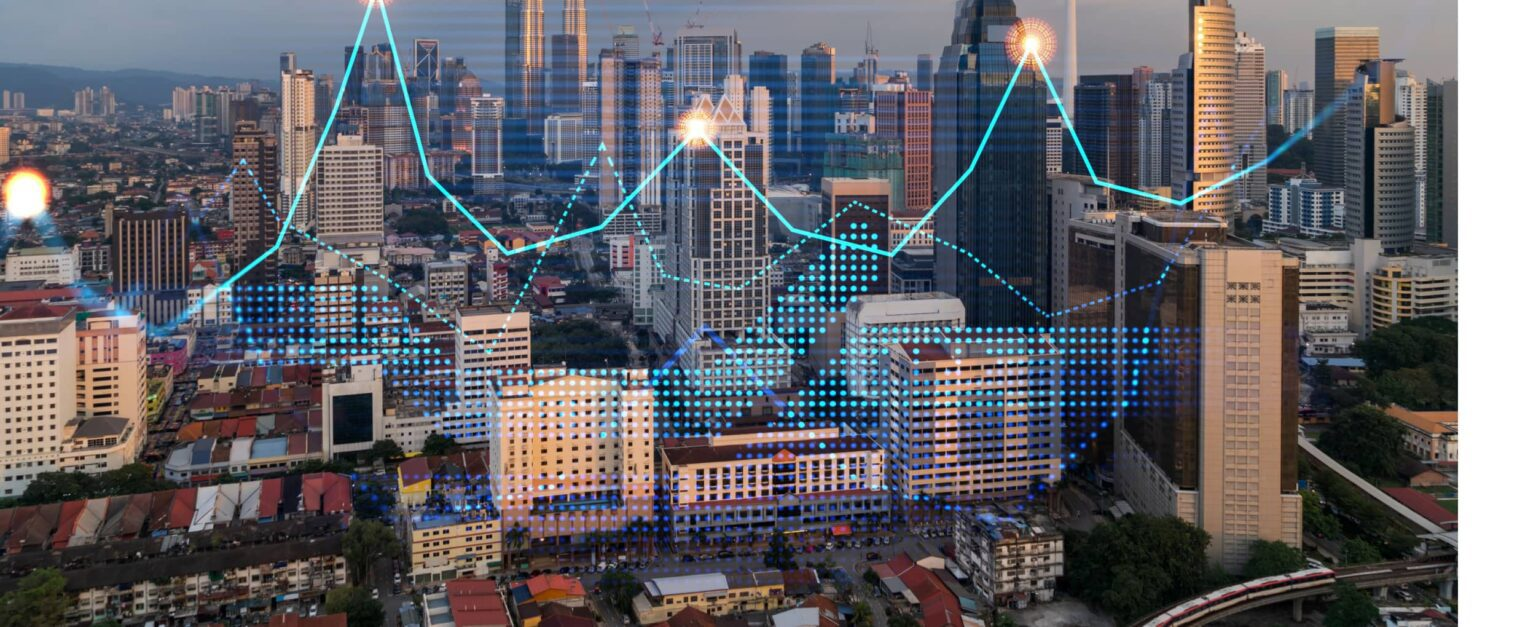

In [ ]:
from IPython.display import Image, display, Markdown

# Judul
display(Markdown("## Predictive Analytics : Hotel Booking Demand"))

# Gambar Headline
display(Image("Hotel-Demand-Forecasting-blog-1536x627.jpg", width=800))

## Business Understanding

### Problem Statements
Rumusan Masalah

Rumusan masalah dari latar belakang di atas adalah:
*   Kapan waktu terbaik untuk memesan hotel agar mendapatkan harga terbaik?
*   Berapa lama idealnya menginap untuk mengoptimalkan biaya?

Goals

Tujuan dari analisis ini adalah:
*   Mengetahui pola musiman dan waktu dalam setahun yang paling tepat untuk melakukan pemesanan hotel dengan harga terbaik.
*   Mengidentifikasi durasi menginap yang memberikan efisiensi biaya tertinggi bagi pelanggan berdasarkan data historis.

Solution Statements


*   Melakukan eksplorasi data (EDA) untuk melihat tren harga harian berdasarkan waktu pemesanan (bulan, hari, musim) dan lama tinggal.Menggunakan visualisasi data (line chart, boxplot, heatmap) untuk menggambarkan hubungan antara waktu dan harga, serta durasi menginap dengan biaya per malam.
*   Membangun model regresi sederhana (jika diperlukan) untuk memprediksi harga harian berdasarkan waktu pemesanan dan durasi menginap.Memberikan rekomendasi praktis bagi konsumen dan manajemen hotel berdasarkan hasil analisis tren harga.

Metodologi

Proyek ini menggunakan pendekatan exploratory data analysis untuk menjawab pertanyaan bisnis terkait waktu dan durasi terbaik untuk menginap. Analisis dilakukan terhadap data pemesanan hotel, dengan fokus pada harga harian (ADR) sebagai variabel target. Prosesnya meliputi pembersihan data, analisis distribusi, identifikasi tren musiman, serta pembuatan visualisasi untuk mendukung interpretasi hasil.

# Data Understanding
adalah tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

## Data Loading
Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

### Informasi Datasets

| **Jenis**       | **Keterangan** |
|------------------|----------------|
| Title            | Hotel Booking Demand |
| Source           | [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) |
| Owner            | Jesse Mostipak |
| License          | Unknown |
| Visibility       | Publik |
| Tags             | Hotel, Booking, Demand, Cancellations, Data Science, Machine Learning |

Import Data

In [1]:
# Import Data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/dataset/hotel_bookings.csv')

Explore Data

In [2]:
# Menampilkan 5 data pertama
print("=== Lima Data Pertama ===")
print(df.head())

print("\n=== Lima Data Terakhir ===")
print(df.tail())

=== Lima Data Pertama ===
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  .

Dari hasil Output kode di atas memberikan informasi sebagai berikut:

Dataset terdiri dari 119.390 baris dan 32 kolom.

**Exploratory Data Analysis – Deskripsi Variabel**

Berdasarkan informasi dari Kaggle, variabel-variabel pada Hotel Booking Demand Dataset adalah sebagai berikut:

**hotel**: Jenis hotel yang dipesan (Resort Hotel atau City Hotel)

**is_canceled**: Menunjukkan apakah reservasi dibatalkan (1 = dibatalkan, 0 = tidak)

**lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan

**arrival_date_year**: Tahun kedatangan tamu

**arrival_date_month**: Bulan kedatangan tamu

**arrival_date_week_number**: Minggu ke-berapa dalam tahun kedatangan

**arrival_date_day_of_month**: Tanggal dalam bulan kedatangan

**stays_in_weekend_nights**: Jumlah malam yang dipesan pada akhir pekan (Sabtu-Minggu)

**stays_in_week_nights**: Jumlah malam yang dipesan pada hari kerja (Senin-Jumat)

**adults**: Jumlah orang dewasa dalam pemesanan

**children**: Jumlah anak-anak dalam pemesanan

**babies**: Jumlah bayi dalam pemesanan

**meal**: Jenis paket makan yang dipilih (BB, HB, FB, SC)

**country**: Kode negara tempat pemesan berasal

**market_segment**: Segmentasi pasar pemesan (misalnya: Online TA, Groups, Corporate)

**distribution_channel**: Saluran distribusi pemesanan

**is_repeated_guest**: Menunjukkan apakah tamu merupakan tamu yang datang kembali (1 = ya, 0 = tidak)

**previous_cancellations**: Jumlah pembatalan sebelumnya oleh tamu

**previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan

**reserved_room_type**: Tipe kamar yang awalnya dipesan

**assigned_room_type**: Tipe kamar yang akhirnya diberikan

**booking_changes**: Jumlah perubahan yang dilakukan pada pemesanan

**deposit_type**: Jenis deposit yang diberikan (No Deposit, Non Refund, Refundable)

**agent**: ID agen perjalanan yang memproses pemesanan

**company**: ID perusahaan yang memesan (jika ada)

**days_in_waiting_list**: Jumlah hari pemesanan berada di daftar tunggu

**customer_type**: Tipe pelanggan (Transient, Contract, Group, Transient-Party)

**adr**: Average Daily Rate (rata-rata tarif harian dalam euro)

**required_car_parking_spaces**: Jumlah tempat parkir yang diminta

**total_of_special_requests**: Jumlah permintaan khusus oleh tamu

**reservation_status**: Status akhir reservasi (Check-Out, Canceled, No-Show)

**reservation_status_date**: Tanggal ketika status reservasi terakhir kali diperbarui

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari output di atas diketahui bahwa:

Dataset terdiri dari 119.390 baris dan 32 kolom.

Terdapat 4 kolom dengan tipe data float64, yaitu:

- children

- agent

- company

- adr

Terdapat 16 kolom dengan tipe data int64, di antaranya:

- is_canceled

- lead_time

- arrival_date_year

- arrival_date_week_number

- arrival_date_day_of_month

- stays_in_weekend_nights

- stays_in_week_nights

- adults

- babies

- is_repeated_guest

- previous_cancellations

- previous_bookings_not_canceled

- booking_changes

- days_in_waiting_list

- required_car_parking_spaces

- total_of_special_requests

Terdapat 12 kolom dengan tipe data object (string), di antaranya:

- hotel

- arrival_date_month

- meal

- country

- market_segment

- distribution_channel

- reserved_room_type

- assigned_room_type

- deposit_type

- customer_type

- reservation_status

- reservation_status_date

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000




Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

Cleaning Data

In [5]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

np.int64(31994)

Dari hasil output menunjukkan bahwa ada 31.994 baris dalam DataFrame yang merupakan duplikat.

In [6]:
# Hapus baris duplikat dari DataFrame
df.drop_duplicates(inplace=True)

# Cek jumlah baris duplikat setelah penghapusan
duplicated_after = df.duplicated().sum()
print(f"Jumlah baris duplikat setelah dihapus: {duplicated_after}")

Jumlah baris duplikat setelah dihapus: 0


Berdasarkan output diatas data duplikat berhasil dihapus

In [7]:
# Mengecek jumlah nilai kosong pada setiap kolom
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

# Daftar kolom yang akan dihapus karena tidak relevan untuk analisis harga dan durasi
drop_column = [
    'reservation_status',
    'reservation_status_date',
    'is_canceled',
    'children', 'babies', 'adults',
    'country',
    'agent', 'company',
    'assigned_room_type', 'reserved_room_type',
    'distribution_channel', 'deposit_type',
    'days_in_waiting_list',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'is_repeated_guest',
    'required_car_parking_spaces',
    'total_of_special_requests',
]

# Menghapus kolom yang tidak dibutuhkan
df_cleaned = df.drop(columns=drop_column, errors='ignore')

# Menampilkan bentuk data setelah kolom tidak relevan dihapus
print("\nBentuk data setelah kolom tidak relevan dihapus:")
print(df_cleaned.info())

Jumlah missing values per kolom:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company

### Kolom yang Tidak Relevan untuk Analisis Waktu Pemesanan dan Durasi Menginap terhadap Harga

Kolom tersebut dihapus karena tidak memberikan kontribusi yang signifikan:

1. **Kapan waktu terbaik untuk memesan hotel agar mendapatkan harga terbaik?**
2. **Berapa lama idealnya menginap untuk mengoptimalkan biaya?**

Berikut adalah daftar kolom yang dianggap tidak relevan beserta alasannya:

| Kolom                              | Alasan                                                                 |
|------------------------------------|------------------------------------------------------------------------|
| `reservation_status`              | Menjelaskan status akhir, tapi tidak relevan jika fokus hanya pada harga dan durasi. |
| `reservation_status_date`         | Tanggal status akhir; kurang relevan.                                  |
| `is_canceled`                     | Dihapus jika hanya fokus pada reservasi yang tidak dibatalkan (filter terlebih dahulu). |
| `children`, `babies`, `adults`    | Tidak berpengaruh langsung terhadap durasi dan waktu pemesanan.        |
| `country`                         | Hanya relevan jika ingin analisis berdasarkan lokasi tamu.             |
| `agent`, `company`                | Banyak nilai kosong dan tidak relevan dengan analisis harga & durasi.  |
| `assigned_room_type`, `reserved_room_type` | Relevansi rendah untuk tujuan utama.                        |
| `distribution_channel`, `deposit_type` | Tidak berdampak langsung pada harga atau durasi.             |
| `days_in_waiting_list`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `is_repeated_guest`, `required_car_parking_spaces`, `total_of_special_requests` | Relevan untuk analisis permintaan khusus atau prediksi pembatalan, namun tidak diperlukan untuk fokus pada harga & lama menginap. |

Total data setelah kolom tidak relevan dihapus:
(87396, 12)

Mengecek dan Menangani Outlier dengan IQR Method

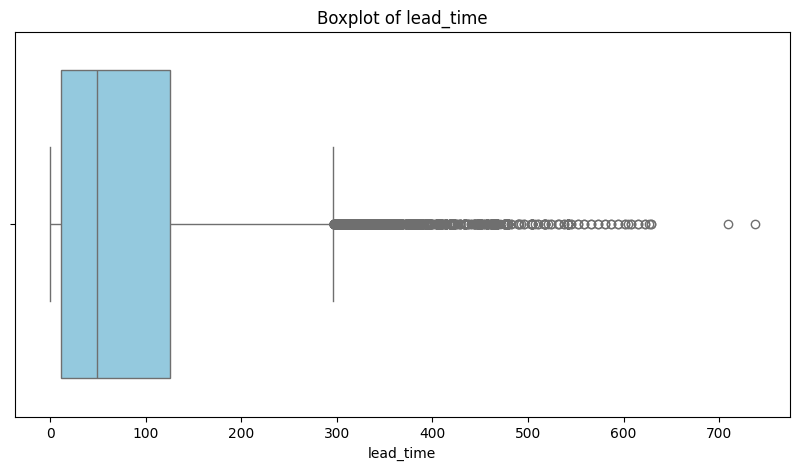

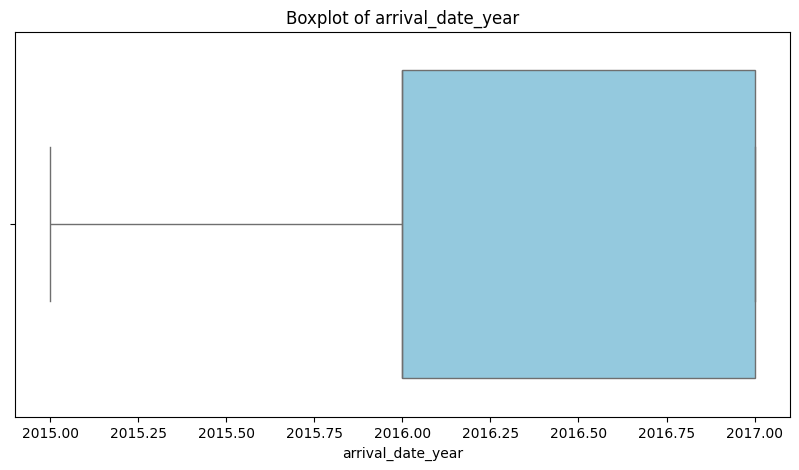

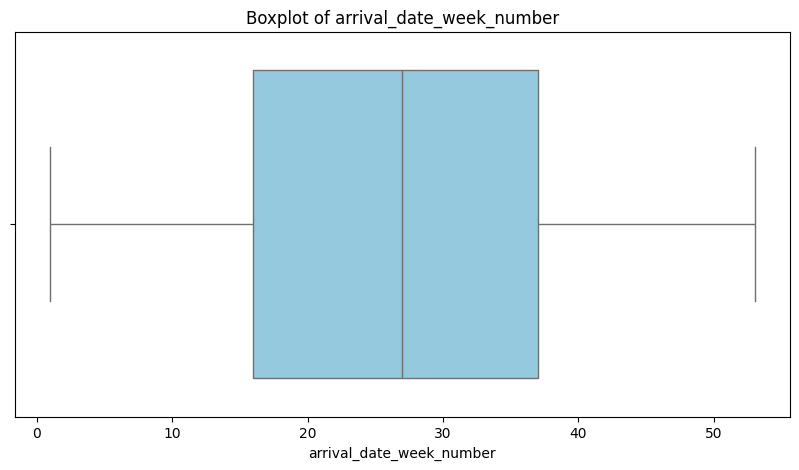

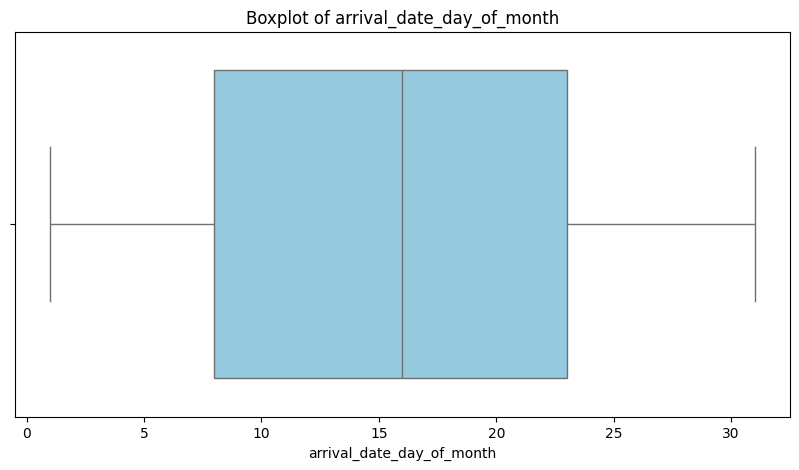

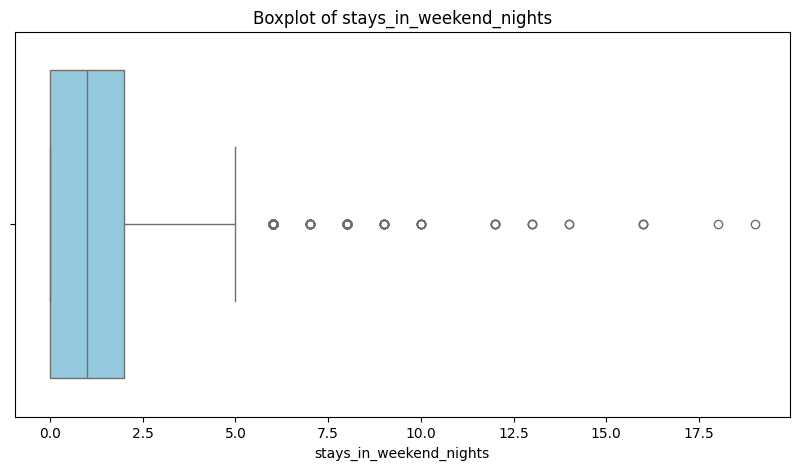

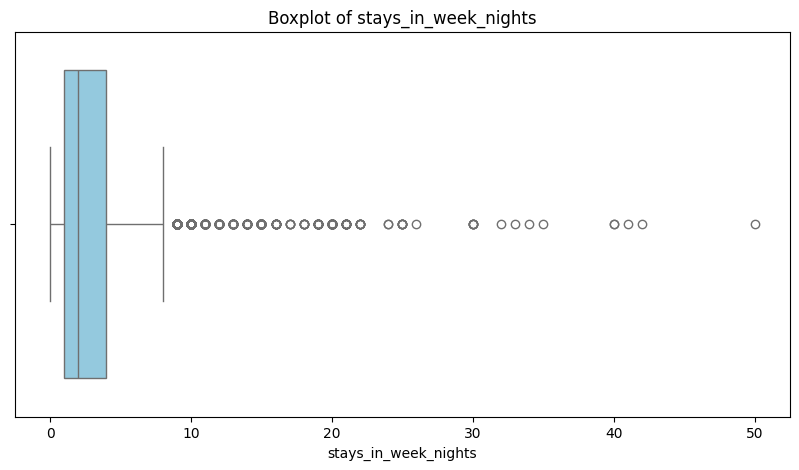

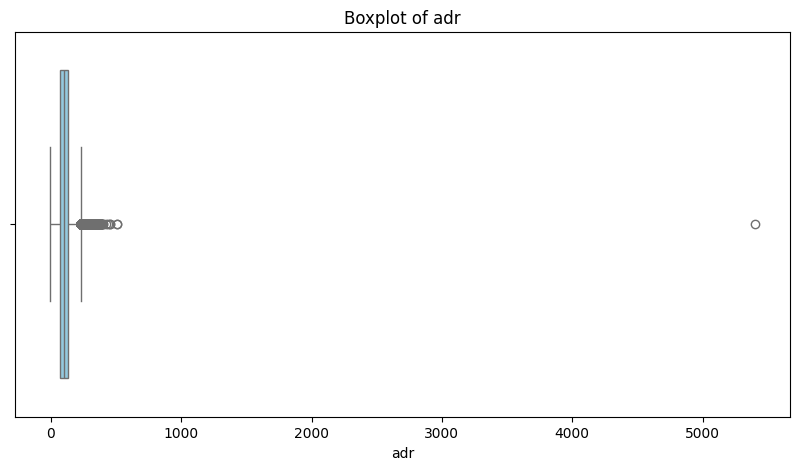

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur numerik yang ingin dicek outlier-nya
numerical_features = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adr',
]

# Visualisasi boxplot untuk setiap fitur numerik
for num in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

In [9]:
selected_cols = df_cleaned[numerical_features]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
df_filtered.shape

(81186, 12)

Total Data Menjadi (81186, 12) Setelah Penghapusan Outlier

Categorical Features


--- HOTEL ---
              Jumlah Sample  Persentase (%)
hotel                                      
City Hotel            53428           61.13
Resort Hotel          33968           38.87


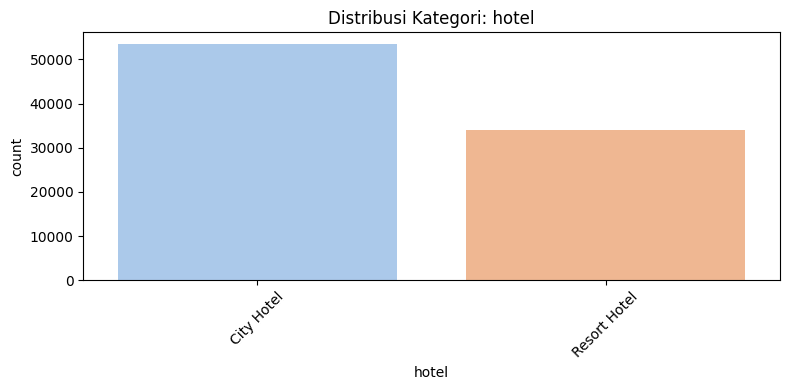


--- ARRIVAL_DATE_MONTH ---
                    Jumlah Sample  Persentase (%)
arrival_date_month                               
August                      11257           12.88
July                        10057           11.51
May                          8355            9.56
April                        7908            9.05
June                         7765            8.88
March                        7513            8.60
October                      6934            7.93
September                    6690            7.65
February                     6098            6.98
December                     5131            5.87
November                     4995            5.72
January                      4693            5.37


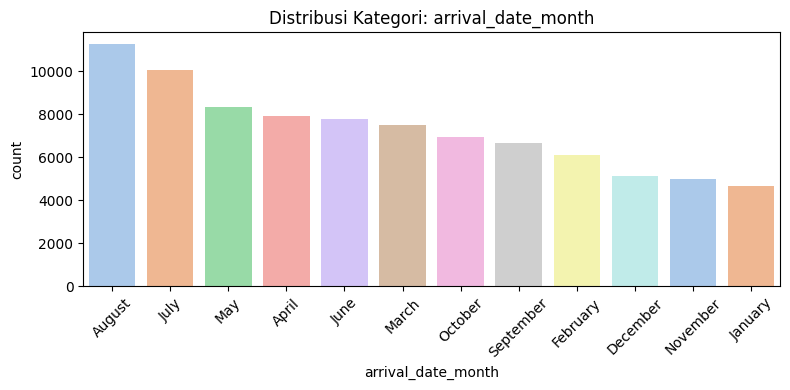


--- MEAL ---
           Jumlah Sample  Persentase (%)
meal                                    
BB                 67978           77.78
SC                  9481           10.85
HB                  9085           10.40
Undefined            492            0.56
FB                   360            0.41


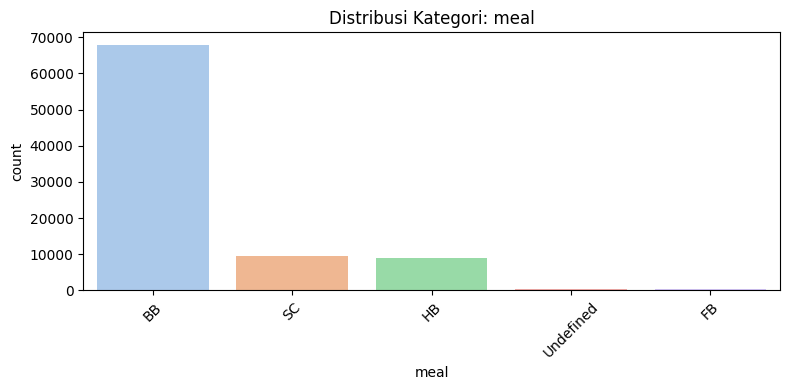


--- MARKET_SEGMENT ---
                Jumlah Sample  Persentase (%)
market_segment                               
Online TA               51618           59.06
Offline TA/TO           13889           15.89
Direct                  11804           13.51
Groups                   4942            5.65
Corporate                4212            4.82
Complementary             702            0.80
Aviation                  227            0.26
Undefined                   2            0.00


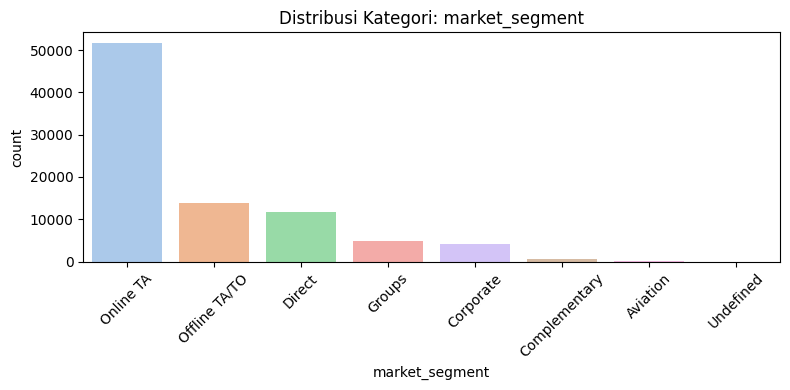


--- CUSTOMER_TYPE ---
                 Jumlah Sample  Persentase (%)
customer_type                                 
Transient                71986           82.37
Transient-Party          11727           13.42
Contract                  3139            3.59
Group                      544            0.62


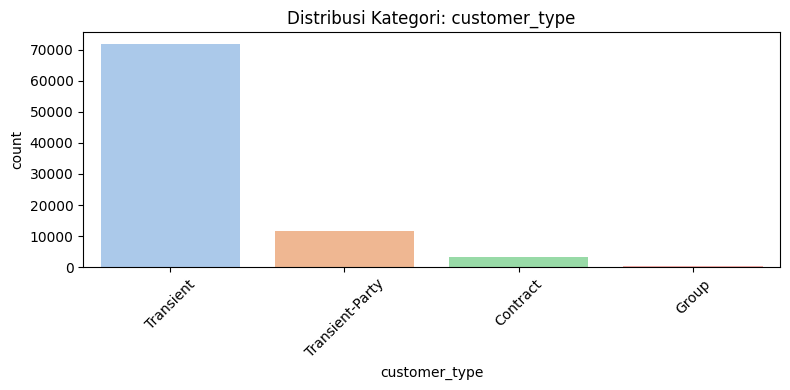

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan fitur kategorikal yang ingin dieksplorasi
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'customer_type']

# Eksplorasi tiap fitur kategorikal
for feature in categorical_features:
    print(f'\n--- {feature.upper()} ---')

    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    df_cat = pd.DataFrame({'Jumlah Sample': count, 'Persentase (%)': percent.round(2)})
    print(df_cat)

    # Visualisasi
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=count.index, palette='pastel')
    plt.title(f'Distribusi Kategori: {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### EDA Univariate

#### 1. Hotel
- **City Hotel** digunakan oleh **61.13%** tamu.  
- **Resort Hotel** digunakan oleh **38.87%** tamu.  

*Dapat disimpulkan bahwa sebagian besar tamu lebih memilih menginap di City Hotel dibandingkan Resort Hotel.*

---

#### 2. Arrival Date Month
- **Bulan Agustus** memiliki jumlah reservasi tertinggi sebesar **12.88%**.  
- Disusul oleh **Juli (11.51%)**, **Mei (9.56%)**, dan **April (9.05%)**.  

*Pemesanan tertinggi terjadi pada bulan-bulan musim panas, terutama Juli dan Agustus, yang mengindikasikan periode *high season*.*

---

#### 3. Meal
- **BB (Bed & Breakfast)** menjadi pilihan terbanyak, mencapai **77.78%** dari total tamu.  
- Diikuti oleh **SC (Self Catering)** sebanyak **10.85%**, dan **HB (Half Board)** sebanyak **10.40%**.  

*Mayoritas tamu lebih memilih paket sarapan, menunjukkan preferensi kenyamanan selama menginap.*

---

#### 4. Market Segment
- **Online Travel Agent (OTA)** mendominasi dengan **59.06%** pemesanan.  
- Disusul oleh **Offline TA/TO (15.89%)** dan **Direct Booking (13.51%)**.  

*Pemesanan hotel sangat didominasi oleh channel online, menunjukkan pentingnya strategi pemasaran digital.*

---

#### 5. Customer Type
- **Transient** (tamu individual) merupakan segmen terbanyak dengan **82.37%**.  
- Diikuti oleh **Transient-Party** sebesar **13.42%**.  

*Tamu individu adalah target utama hotel, dan cenderung memesan untuk jangka pendek.*


Numerical Features

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya.

Numerical Features

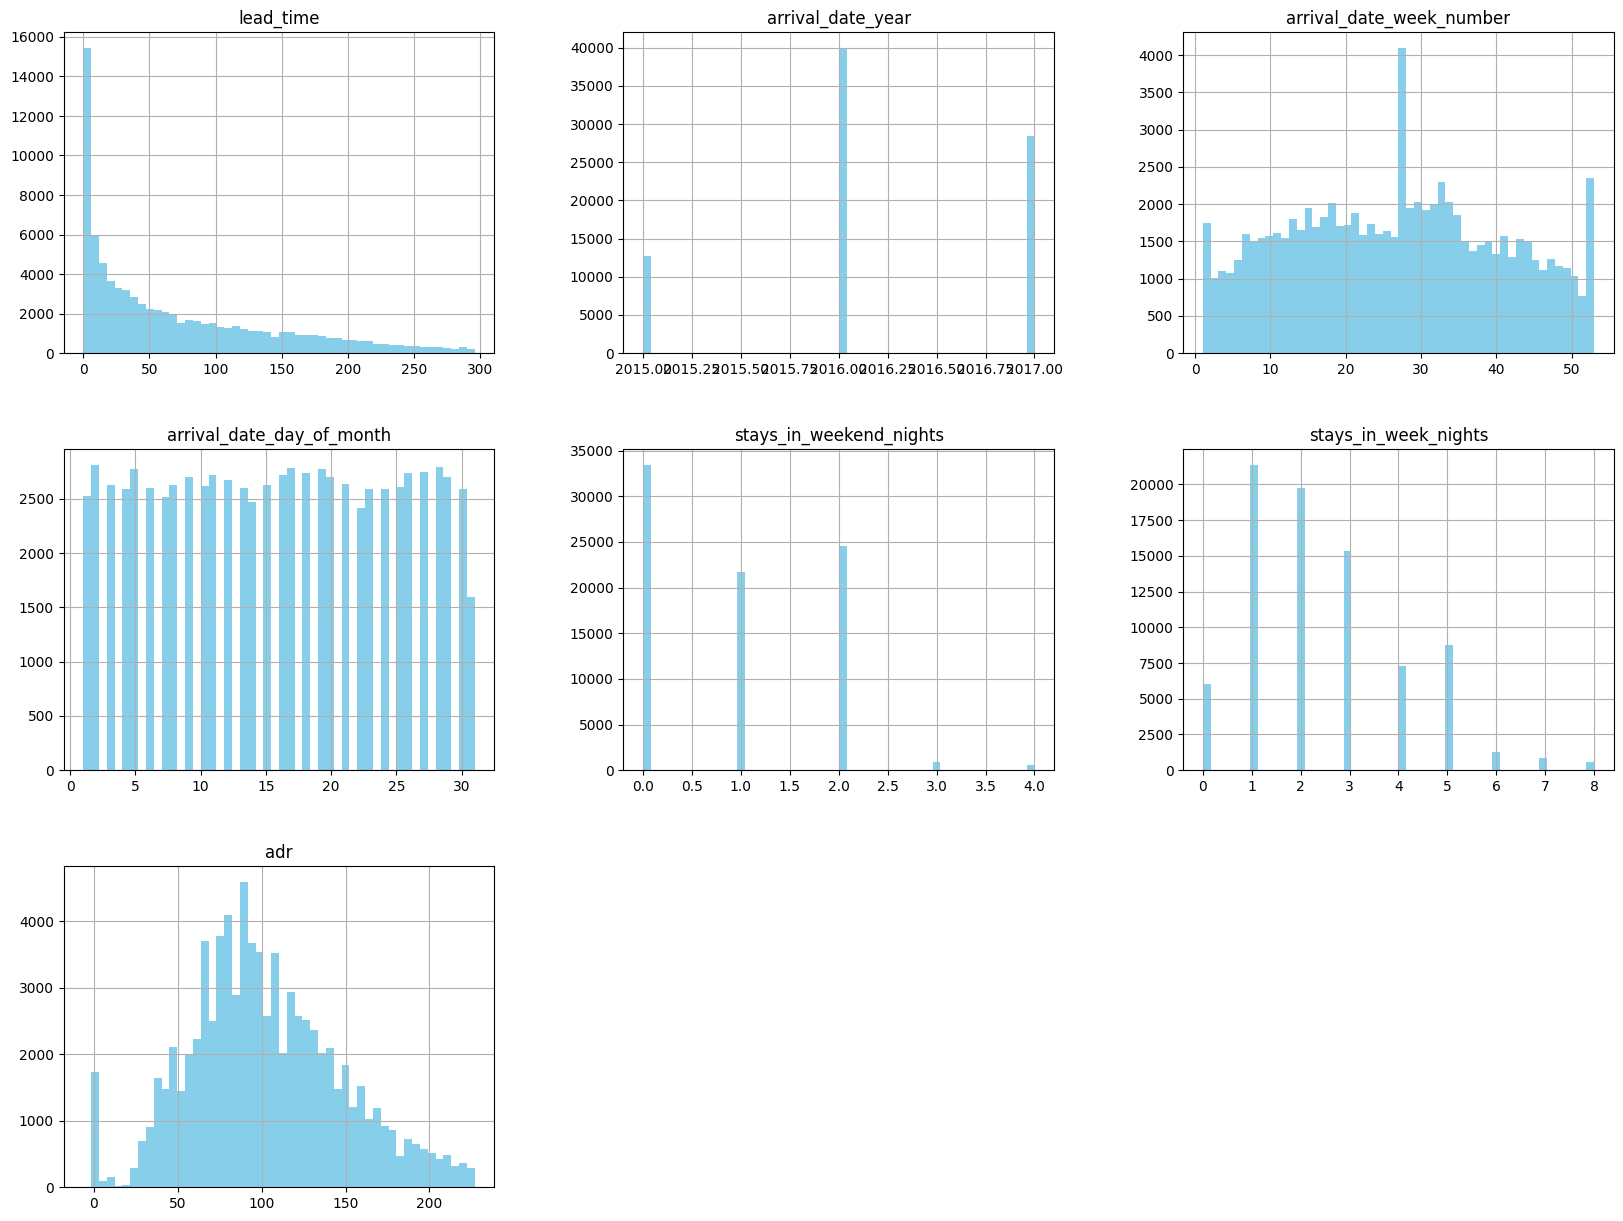

In [12]:
import matplotlib.pyplot as plt

df_filtered.hist(bins=50, figsize=(20, 15), color= 'skyblue')
plt.show()

Dari beberapa visualisasi diatas dapat disimpulkan sebagai berikut:

####**Lead Time**
- Histogram `lead_time` menunjukkan mayoritas pemesanan dilakukan dalam waktu kurang dari 50 hari sebelum kedatangan.
- Distribusinya **right-skewed**, menandakan ada sebagian kecil tamu yang memesan jauh-jauh hari.

####**Tahun Kedatangan**
- Fitur `arrival_date_year` menunjukkan jumlah tertinggi pada tahun **2016**, menandakan data tahun tersebut paling dominan dalam dataset.

####**Distribusi Kedatangan**
- Fitur `arrival_date_week_number` dan `arrival_date_day_of_month` menunjukkan variasi kedatangan tamu yang cukup **merata** sepanjang minggu dan bulan.
- Namun, minggu ke-**28** menunjukkan **lonjakan signifikan**—kemungkinan karena libur musim panas atau event khusus.

####**Durasi Menginap**
- Fitur `stays_in_week_nights` dan `stays_in_weekend_nights` didominasi oleh nilai **1 dan 2 malam**.
- Menandakan sebagian besar tamu **tidak tinggal terlalu lama**.

####**Distribusi Harga per Malam (`adr`)**
- Distribusi `adr` **cukup normal** dengan rata-rata sekitar **100**, namun memiliki **ekor kanan (right-skewed)**.
- Beberapa nilai `adr` sangat tinggi (di atas **200**), kemungkinan merupakan **outlier** atau pemesanan dalam kondisi spesial seperti **event atau high season**.

### Exploratory Data Analysis - Multivariate Analysis

Numerical Features

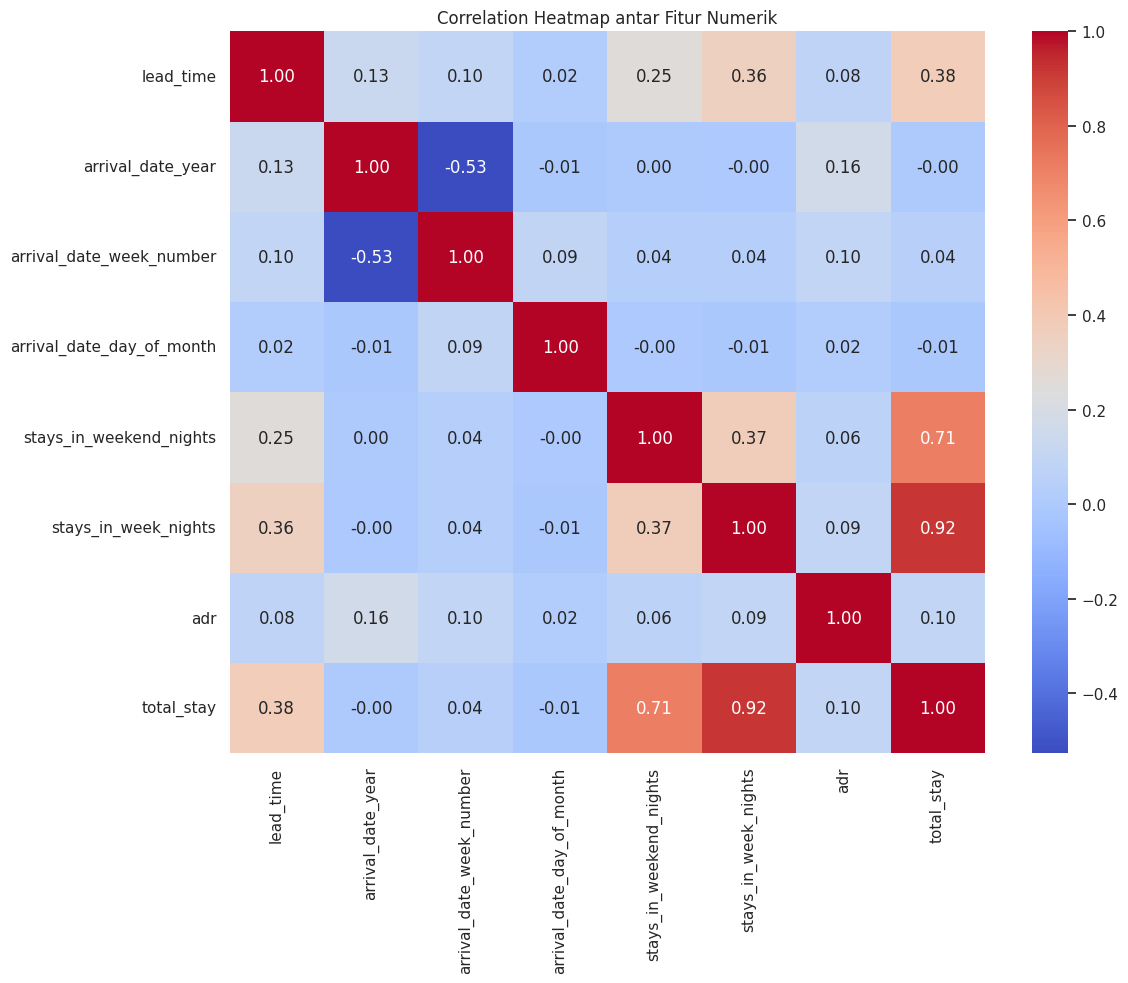

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tambahkan kolom total_stay sebagai lama menginap total
df_filtered['total_stay'] = df_filtered['stays_in_week_nights'] + df_filtered['stays_in_weekend_nights']

# Set gaya visual
sns.set(style="whitegrid")

# 1. Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap antar Fitur Numerik')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi matriks korelasi yang ditampilkan, diperoleh beberapa hubungan penting antar fitur numerik sebagai berikut:

- Korelasi Tinggi antar Fitur Terkait Durasi Inap

  stays_in_week_nights dan total_stay memiliki korelasi sangat kuat (0.92), menunjukkan bahwa jumlah malam di hari kerja adalah komponen utama dari total durasi inap.

  stays_in_weekend_nights dan total_stay juga menunjukkan korelasi yang tinggi sebesar 0.71, yang berarti malam akhir pekan juga memberikan kontribusi signifikan terhadap durasi total menginap.

- Korelasi Lead Time

  lead_time menunjukkan korelasi sedang dengan total_stay (0.38) dan stays_in_week_nights (0.36). Ini mengindikasikan bahwa pemesanan yang dilakukan jauh hari sebelumnya cenderung dikaitkan dengan masa inap yang lebih lama, terutama pada hari kerja.

  Korelasi lead_time terhadap adr (harga per malam) rendah (0.08), yang menunjukkan bahwa waktu pemesanan tidak banyak memengaruhi harga per malam secara langsung.

- Fitur adr (Average Daily Rate)

  adr memiliki korelasi sangat rendah dengan semua fitur lain, termasuk total_stay (0.10) dan lead_time (0.08). Ini menandakan bahwa rata-rata harga per malam kemungkinan besar lebih dipengaruhi oleh variabel non-numerik seperti tipe kamar, jenis pelanggan, musim, atau status reservasi.

- Tanggal Kedatangan

  Fitur-fitur yang berkaitan dengan tanggal kedatangan seperti arrival_date_year, arrival_date_week_number, dan arrival_date_day_of_month memiliki korelasi rendah terhadap fitur lainnya, termasuk adr dan total_stay. Hal ini mengindikasikan bahwa tidak terdapat pola linier kuat antara tanggal kedatangan dengan fitur numerik lainnya.

- Korelasi Negatif

  Satu-satunya korelasi negatif yang mencolok adalah antara arrival_date_year dan arrival_date_week_number (-0.53). Ini dapat mencerminkan distribusi data berdasarkan waktu, misalnya lebih banyak pemesanan di minggu-minggu tertentu pada tahun-tahun tertentu.

📌 Tujuan:
- Mengetahui waktu terbaik memesan hotel untuk mendapatkan harga terbaik (adr).

- Mengetahui lama inap ideal untuk biaya efisien (total_cost).

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat fitur tambahan
df_filtered['total_stay'] = df_filtered['stays_in_weekend_nights'] + df_filtered['stays_in_week_nights']
df_filtered['total_cost'] = df_filtered['adr'] * df_filtered['total_stay']

# Cek missing values
print(df_filtered[['adr', 'lead_time', 'arrival_date_month', 'market_segment', 'total_stay', 'total_cost']].isnull().sum())

adr                   0
lead_time             0
arrival_date_month    0
market_segment        0
total_stay            0
total_cost            0
dtype: int64


dari hasil output diatas tidak ada missing values pada kolom yang baru dibuat yaitu total_stay, total_cost

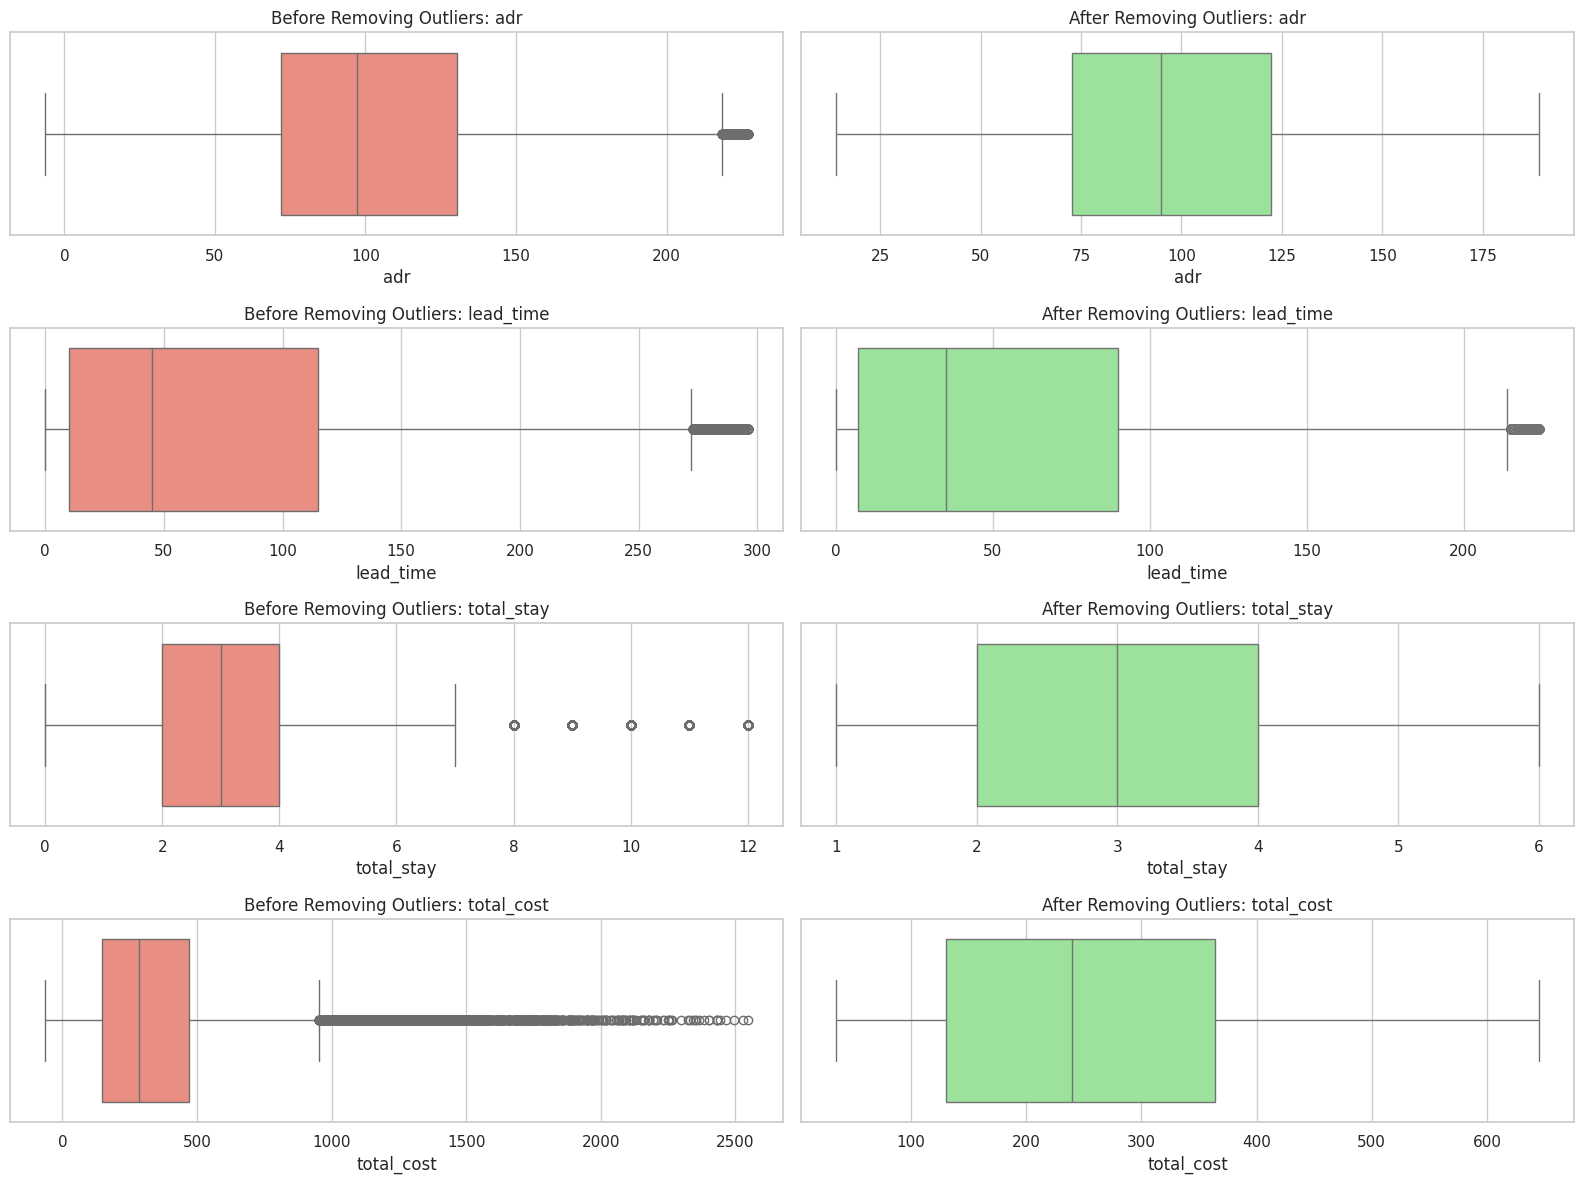

Total data sebelum penghapusan outlier: 81186
Total data setelah penghapusan outlier: 59891


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tambahkan fitur baru
df_filtered['total_stay'] = df_filtered['stays_in_weekend_nights'] + df_filtered['stays_in_week_nights']
df_filtered['total_cost'] = df_filtered['adr'] * df_filtered['total_stay']

# Kolom target
columns_to_plot = ['adr', 'lead_time', 'total_stay', 'total_cost']

# Fungsi penghapusan outlier standar
def remove_outliers_strict(df, column, iqr_multiplier=1.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - iqr_multiplier * IQR
    upper_iqr = Q3 + iqr_multiplier * IQR

    # Tambahan: quantile ekstrem
    lower_q = df[column].quantile(0.01)
    upper_q = df[column].quantile(0.99)

    # Ambil batas lebih ketat
    lower_bound = max(lower_iqr, lower_q)
    upper_bound = min(upper_iqr, upper_q)

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Fungsi khusus untuk kolom skewed (lead_time)
def remove_outliers_quantile(df, column, lower_q=0.05, upper_q=0.95):
    low = df[column].quantile(lower_q)
    high = df[column].quantile(upper_q)
    return df[(df[column] >= low) & (df[column] <= high)]

# Backup data sebelum
df_before = df_filtered.copy()
df_cleaned = df_filtered.copy()

# Iterasi penghapusan outlier
for col in columns_to_plot:
    if col == 'lead_time':
        df_cleaned = remove_outliers_quantile(df_cleaned, col, 0.05, 0.95)
    else:
        df_cleaned = remove_outliers_strict(df_cleaned, col, iqr_multiplier=1.0)

# Visualisasi Before vs After
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 2, 2*i + 1)
    sns.boxplot(x=df_before[col], color='salmon')
    plt.title(f'Before Removing Outliers: {col}')
    plt.xlabel(col)

    plt.subplot(len(columns_to_plot), 2, 2*i + 2)
    sns.boxplot(x=df_cleaned[col], color='lightgreen')
    plt.title(f'After Removing Outliers: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Print total data sebelum dan sesudah penghapusan outlier
print(f"Total data sebelum penghapusan outlier: {df_before.shape[0]}")
print(f"Total data setelah penghapusan outlier: {df_cleaned.shape[0]}")

Total data menjadi 59891 setelah penghapusan outlier

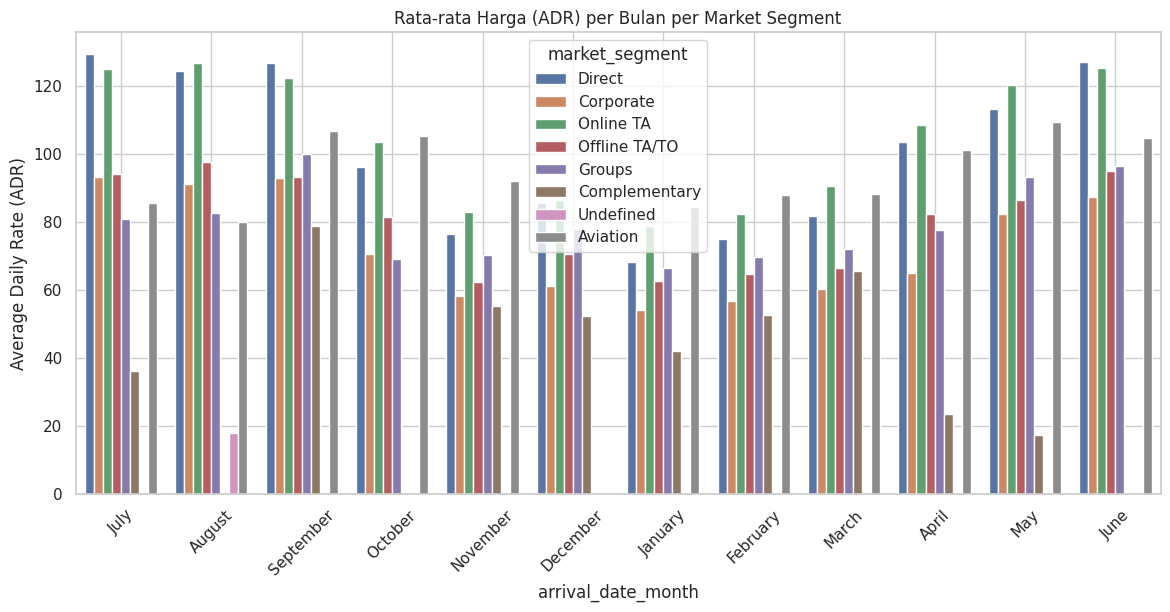

In [16]:
# Rata-rata harga hotel (adr) berdasarkan bulan dan market segment
plt.figure(figsize=(14,6))
sns.barplot(data=df_cleaned, x='arrival_date_month', y='adr', hue='market_segment', ci=None)
plt.title('Rata-rata Harga (ADR) per Bulan per Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Dari hasil visualisasi tersebut dapat disimpulkan:

- Harga rata-rata harian (ADR) bervariasi setiap bulan dan berbeda antar segmen pasar.

- Segmen Direct dan Online TA cenderung memiliki ADR lebih tinggi dibanding segmen lain hampir di seluruh bulan.

- ADR tertinggi terjadi di bulan Juli, Agustus, September, menunjukkan musim puncak atau permintaan tinggi.

- Bulan Januari dan Februari memiliki ADR paling rendah, menandakan musim sepi atau penurunan permintaan.

- Segmen Complementary memiliki ADR paling rendah secara konsisten.

- Pola musiman ini penting untuk strategi penetapan harga dan promosi sesuai segmen pasar dan waktu kedatangan tamu.

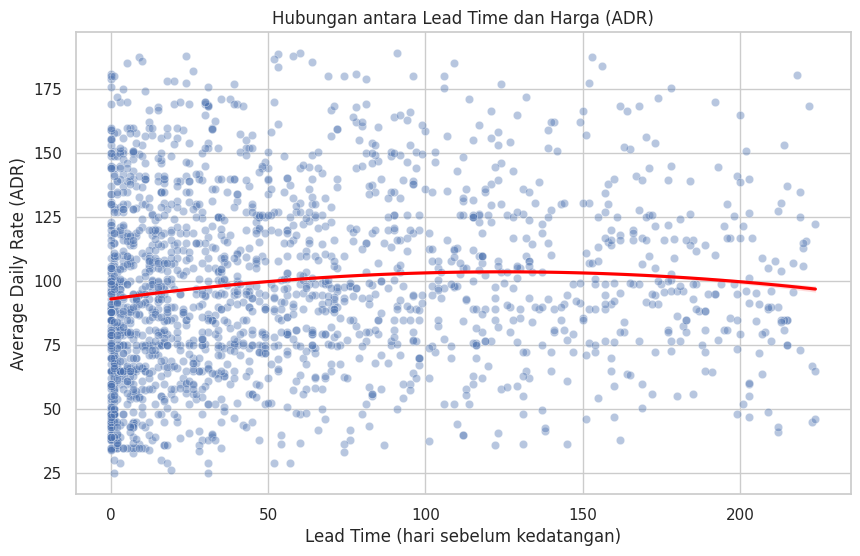

In [17]:
# Hubungan antara lead_time dan adr (dengan scatter + tren non-linear)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned.sample(2000), x='lead_time', y='adr', alpha=0.4)
sns.regplot(data=df_cleaned, x='lead_time', y='adr', scatter=False, color='red', order=2)
plt.title('Hubungan antara Lead Time dan Harga (ADR)')
plt.xlabel('Lead Time (hari sebelum kedatangan)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()

Dari visualisasi tersebut dapat dijelaskan:

- Plot menunjukkan hubungan antara Lead Time (jumlah hari sebelum kedatangan) dengan Harga Harian Rata-rata (ADR).

- Sebagian besar reservasi dilakukan dengan Lead Time rendah (konsentrasi data di dekat 0 hari).

- Garis tren (merah) memperlihatkan pola naik dulu sedikit lalu menurun setelah Lead Time sekitar 100-150 hari.

- Artinya, harga ADR cenderung sedikit meningkat jika reservasi dilakukan dengan Lead Time sedang, tetapi menurun untuk Lead Time yang sangat lama.

- Pola ini bisa berarti bahwa booking dengan waktu terlalu lama sebelum kedatangan cenderung mendapatkan harga lebih rendah, mungkin karena promosi awal atau strategi diskon.

- Namun, hubungan ini tidak terlalu kuat, terlihat dari penyebaran titik data yang cukup lebar.

Singkatnya, ada kecenderungan ADR naik dulu lalu turun seiring bertambahnya Lead Time, tapi dengan variasi harga yang besar di setiap rentang waktu.

### Lama Inap Ideal untuk Mengoptimalkan Biaya

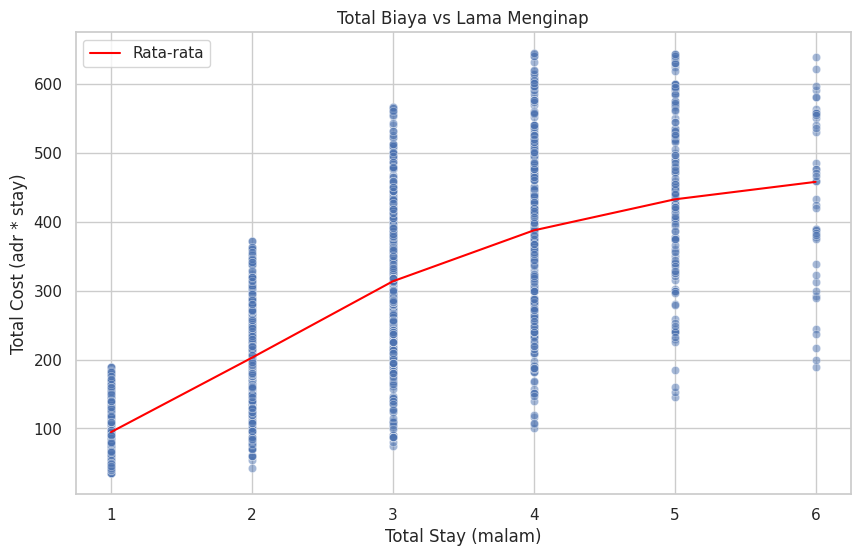

In [18]:
# Visualisasi hubungan total_stay dengan total_cost
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned.sample(2000), x='total_stay', y='total_cost', alpha=0.5)
sns.lineplot(data=df_cleaned.groupby('total_stay')['total_cost'].mean().reset_index(),
             x='total_stay', y='total_cost', color='red', label='Rata-rata')
plt.title('Total Biaya vs Lama Menginap')
plt.xlabel('Total Stay (malam)')
plt.ylabel('Total Cost (adr * stay)')
plt.grid(True)
plt.legend()
plt.show()

Dari visualisasi tersebut dapat dijelaskan:

- Titik-titik biru mewakili data individual dari setiap reservasi.

- Garis merah menunjukkan rata-rata total biaya untuk setiap lama menginap.

- Terlihat tren bahwa semakin lama menginap, total biaya rata-rata semakin meningkat, yang masuk akal karena biaya dihitung berdasarkan harga per malam dikalikan jumlah malam menginap.

- Namun, kenaikan total biaya mulai melambat setelah lama menginap 4-6 malam, terlihat dari kemiringan garis rata-rata yang mulai mendatar.

- Hal ini bisa mengindikasikan adanya diskon atau harga yang lebih rendah per malam jika menginap lebih lama (efek tarif diskon untuk masa inap panjang).

- Ada juga variasi besar pada total biaya dalam tiap kategori lama menginap, menunjukkan harga per malam yang bervariasi antar reservasi.

Singkatnya, total biaya meningkat seiring lama menginap, namun kenaikan biaya tidak selalu linear, bisa ada penyesuaian harga untuk lama menginap yang lebih panjang.

Categorical Features

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sort bulan sesuai urutan waktu
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_cleaned['arrival_date_month'] = pd.Categorical(df_cleaned['arrival_date_month'], categories=bulan_order, ordered=True)

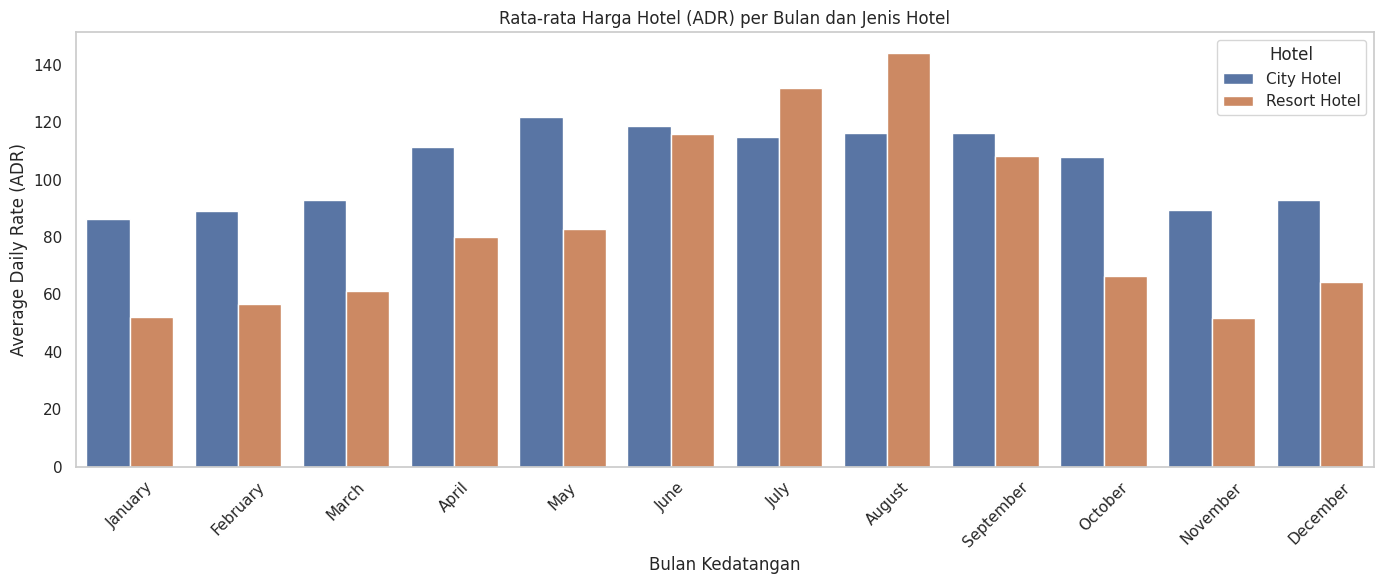

In [21]:
# Pastikan bulan dalam urutan yang benar
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_cleaned['arrival_date_month'] = pd.Categorical(df_cleaned['arrival_date_month'], categories=bulan_order, ordered=True)

# Hitung rata-rata adr per bulan per hotel
monthly_avg_adr = df_cleaned.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(14,6))
sns.barplot(data=monthly_avg_adr, x='arrival_date_month', y='adr', hue='hotel')
plt.title('Rata-rata Harga Hotel (ADR) per Bulan dan Jenis Hotel')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

Visualisasi tersebut menunjukkan rata-rata harga harian (ADR) hotel per bulan berdasarkan jenis hotel (City Hotel vs Resort Hotel).

- City Hotel cenderung memiliki ADR yang stabil dan lebih tinggi dari Resort Hotel pada sebagian besar bulan, terutama di bulan-bulan non-musim liburan.

- Resort Hotel menunjukkan kenaikan tajam ADR di bulan Juni–Agustus, dengan puncaknya di Agustus (mencapai lebih dari 140), yang kemungkinan besar disebabkan oleh musim liburan atau peak season.

- Setelah Agustus, ADR Resort Hotel turun drastis, kembali lebih rendah dari City Hotel.

- Hal ini menunjukkan bahwa City Hotel lebih stabil sepanjang tahun, sementara Resort Hotel sangat dipengaruhi oleh musim liburan.

Kesimpulan:

- Untuk mencari harga terbaik di Resort Hotel, hindari musim liburan (Juli–Agustus).

- Untuk City Hotel, fluktuasi harga tidak terlalu besar, lebih cocok untuk perjalanan bisnis yang fleksibel.

### Data Preparation
Teknik Data preparation yang dilakukan terdiri dari:
- Label Encoding
- One-Hot Encoding
- Reduksi dimensi dengan PCA
- Train-Test Split

##### Encoding Fitur Kategori

In [22]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding pada kolom 'customer_type'
df_cleaned['customer_type_encoded'] = label_encoder.fit_transform(df_cleaned['customer_type'])

# Melihat hasil encode
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
df_cleaned[['customer_type', 'customer_type_encoded']].head()

{'Contract': np.int64(0), 'Group': np.int64(1), 'Transient': np.int64(2), 'Transient-Party': np.int64(3)}


,customer_type,customer_type_encoded
2,Transient,2
3,Transient,2
4,Transient,2
6,Transient,2
7,Transient,2


Dari hasil output diatas Fitur Customer_type diubah menggunakan LabelEncoder

In [23]:
# One-hot encoding pada kolom kategorikal non-ordinal
# Terapkan One-Hot Encoding pada kolom kategorikal non-ordinal
df_final = pd.get_dummies(df_cleaned, columns=['hotel', 'meal', 'market_segment', 'arrival_date_month'], prefix=['hotel', 'meal', 'segment', 'month'])

# Tampilkan hasil awal
df_final.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr,total_stay,total_cost,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
2,7,2015,27,1,0,1,Transient,75.0,1,75.0,...,False,False,False,False,True,False,False,False,False,False
3,13,2015,27,1,0,1,Transient,75.0,1,75.0,...,False,False,False,False,True,False,False,False,False,False
4,14,2015,27,1,0,2,Transient,98.0,2,196.0,...,False,False,False,False,True,False,False,False,False,False
6,0,2015,27,1,0,2,Transient,107.0,2,214.0,...,False,False,False,False,True,False,False,False,False,False
7,9,2015,27,1,0,2,Transient,103.0,2,206.0,...,False,False,False,False,True,False,False,False,False,False


Fitur hoter, meal, market segment, arrival_date_month diubah menggunakan One-Hot Encoder

##### Reduksi dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA

In [26]:
from sklearn.decomposition import PCA

# 1. Reduksi fitur durasi inap
stay_cols = ['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay']
pca_stay = PCA(n_components=1, random_state=50)
df_final['stay_combined'] = pca_stay.fit_transform(df_final[stay_cols]).flatten()
df_final.drop(columns=stay_cols, inplace=True)

# 2. Reduksi fitur bulan kedatangan
month_cols = [col for col in df_final.columns if col.startswith('month_')]
pca_month = PCA(n_components=1, random_state=50)
df_final['arrival_month_pca'] = pca_month.fit_transform(df_final[month_cols]).flatten()
df_final.drop(columns=month_cols, inplace=True)

# 3. Reduksi fitur market segment
segment_cols = [col for col in df_final.columns if col.startswith('segment_')]
pca_segment = PCA(n_components=1, random_state=50)
df_final['market_segment_pca'] = pca_segment.fit_transform(df_final[segment_cols]).flatten()
df_final.drop(columns=segment_cols, inplace=True)

# 4. Reduksi fitur meal type
meal_cols = [col for col in df_final.columns if col.startswith('meal_')]
pca_meal = PCA(n_components=1, random_state=50)
df_final['meal_pca'] = pca_meal.fit_transform(df_final[meal_cols]).flatten()
df_final.drop(columns=meal_cols, inplace=True)

In [28]:
df_final.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,customer_type,adr,total_cost,customer_type_encoded,hotel_City Hotel,hotel_Resort Hotel,stay_combined,arrival_month_pca,market_segment_pca,meal_pca
2,7,2015,27,1,Transient,75.0,75.0,2,False,True,-1.976549,-0.052463,-0.761692,0.250648
3,13,2015,27,1,Transient,75.0,75.0,2,False,True,-1.976549,-0.052463,-0.532434,0.250648
4,14,2015,27,1,Transient,98.0,196.0,2,False,True,-0.591422,-0.052463,0.442929,0.250648
6,0,2015,27,1,Transient,107.0,214.0,2,False,True,-0.591422,-0.052463,-0.761692,0.250648
7,9,2015,27,1,Transient,103.0,206.0,2,False,True,-0.591422,-0.052463,-0.761692,-0.529189


##### Train-test-Split

In [29]:
from sklearn.model_selection import train_test_split

# Target untuk pertanyaan 1: harga hotel (ADR)
target_adr = 'adr'

# Target untuk pertanyaan 2: total cost
target_cost = 'total_cost'

# Fitur prediktor: semua kolom kecuali target
# Drop kolom yang redundan atau target
features_to_drop = ['adr', 'total_cost', 'customer_type']  # 'customer_type' karena sudah di-encode
X = df_final.drop(columns=features_to_drop)

# Label encoded customer_type sudah ada di df_final['customer_type_encoded'], jadi tetap dipakai

# Target 1: untuk menjawab pertanyaan 1
y_adr = df_final[target_adr]

# Target 2: untuk menjawab pertanyaan 2
y_cost = df_final[target_cost]

# Split untuk prediksi ADR
X_train_adr, X_test_adr, y_train_adr, y_test_adr = train_test_split(X, y_adr, test_size=0.2, random_state=42)

# Split untuk prediksi Total Cost
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y_cost, test_size=0.2, random_state=42)

# Cek bentuk data
print("Train/Test split untuk prediksi ADR:")
print(X_train_adr.shape, X_test_adr.shape, y_train_adr.shape, y_test_adr.shape)

print("\nTrain/Test split untuk prediksi Total Cost:")
print(X_train_cost.shape, X_test_cost.shape, y_train_cost.shape, y_test_cost.shape)

Train/Test split untuk prediksi ADR:
(47912, 11) (11979, 11) (47912,) (11979,)

Train/Test split untuk prediksi Total Cost:
(47912, 11) (11979, 11) (47912,) (11979,)


Melakukan pembagian data menjadi data pelatihan (train) dan data pengujian (test) untuk dua target yang berbeda:

- Prediksi harga hotel (ADR)

- Prediksi total biaya menginap (Total Cost)

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Fitur numerik yang ingin dinormalisasi
numerical_features = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'customer_type_encoded',
    'stay_combined',
    'arrival_month_pca',
    'market_segment_pca',
    'meal_pca'
]

# === STANDARISASI untuk prediksi ADR ===
scaler_adr = MinMaxScaler()
scaler_adr.fit(X_train_adr[numerical_features])

X_train_adr[numerical_features] = scaler_adr.transform(X_train_adr[numerical_features])
X_test_adr[numerical_features] = scaler_adr.transform(X_test_adr[numerical_features])

# === STANDARISASI untuk prediksi Total Cost ===
scaler_cost = MinMaxScaler()
scaler_cost.fit(X_train_cost[numerical_features])

X_train_cost[numerical_features] = scaler_cost.transform(X_train_cost[numerical_features])
X_test_cost[numerical_features] = scaler_cost.transform(X_test_cost[numerical_features])

# Cek hasil
print("X_train_adr preview:")
print(X_train_adr[numerical_features].head())

print("\nX_train_cost preview:")
print(X_train_cost[numerical_features].head())

X_train_adr preview:
        lead_time  arrival_date_year  arrival_date_week_number  \
115266   0.214286                1.0                  0.500000   
35443    0.000000                1.0                  0.288462   
7434     0.714286                0.5                  0.615385   
58371    0.812500                0.5                  0.788462   
13912    0.008929                0.5                  0.192308   

        arrival_date_day_of_month  customer_type_encoded  stay_combined  \
115266                   0.066667               0.666667       0.000000   
35443                    0.666667               0.666667       0.264318   
7434                     0.266667               0.666667       0.064318   
58371                    0.366667               0.666667       0.064318   
13912                    0.300000               0.666667       0.064318   

        arrival_month_pca  market_segment_pca  meal_pca  
115266           0.324493            1.000000       0.0  
35443          

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

### Model Development
Pada tahapan model development ini algoritma machine learning yang digunakan terdiri dari:
- Random Forest Regressor MultiOutputRegressor
- XGBoost MultiOutputRegressor

#### Random Forest Regressor MultiOutputRegressor

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Definisikan model dasar
base_model = RandomForestRegressor(random_state=42)

# Bungkus model untuk multi-output regression
multi_target_model = MultiOutputRegressor(base_model)

# Fit model dengan dua target sekaligus
y_multi = df_final[['adr', 'total_cost']]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

multi_target_model.fit(X_train_multi, y_train_multi)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

RandomForestRegressor dengan Parameter Berikut:

 1. `n_estimators=100` (default)
- Jumlah pohon keputusan (decision trees) dalam forest.
- Semakin banyak pohon, semakin stabil hasilnya — tetapi waktu komputasi juga meningkat.

 2. `max_depth=None` (default)
- Kedalaman maksimum dari setiap pohon.
- Jika `None`, pohon akan tumbuh sampai semua daun murni (pure) atau hingga tidak bisa dibagi lagi.
- Berfungsi mengontrol kompleksitas model dan membantu mencegah **overfitting** jika diatur.

 3. `min_samples_split=2` (default)
- Jumlah minimum sampel yang diperlukan untuk membagi suatu node.
- Nilai yang lebih besar dapat membantu mencegah **overfitting**.

 4. `min_samples_leaf=1` (default)
- Jumlah minimum sampel yang harus ada di setiap daun.
- Nilai lebih besar menghasilkan pohon yang lebih **seimbang**.

 5. `max_features='auto'` (default pada versi lama, sekarang `'sqrt'`)
- Jumlah maksimum fitur yang dipertimbangkan untuk pemisahan terbaik pada setiap node.
- Biasanya diset ke `'sqrt'` untuk regresi.

 6. `random_state=42`
- Untuk memastikan hasil yang **konsisten** setiap kali model dijalankan (reproducibility).

MultiOutputRegressor

`MultiOutputRegressor` digunakan untuk menangani regresi dengan **dua target sekaligus**, yaitu:

- Target 1: `adr` (Average Daily Rate)
- Target 2: `total_cost` (Biaya total)

Cara kerja:
- MultiOutputRegressor akan membuat **dua model RandomForestRegressor terpisah**, masing-masing untuk memprediksi satu target.


#### XGBoost MultiOutputRegressor

In [32]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# Definisikan model dasar XGBoost
base_xgb_model = XGBRegressor(random_state=42)

# Bungkus model untuk multi-output regression
multi_xgb_model = MultiOutputRegressor(base_xgb_model)

# Siapkan data target multi-output
y_multi = df_final[['adr', 'total_cost']]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

# Fit model dengan dua target sekaligus
multi_xgb_model.fit(X_train_multi, y_train_multi)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

XGBRegressor dengan Parameter Berikut:

- **`n_estimators=100` (default)**  
  Jumlah total pohon (*trees*) yang dibangun oleh model.  
  Semakin banyak pohon, prediksi cenderung lebih akurat, tetapi waktu pelatihan akan meningkat.

- **`max_depth=6` (default)**  
  Kedalaman maksimum dari setiap pohon keputusan.  
  Mengontrol kompleksitas model: semakin besar nilai ini, semakin dalam pohon dan semakin kompleks modelnya.  
  Bisa menyebabkan *overfitting* jika terlalu besar.

- **`learning_rate=0.3` (default)**  
  Menentukan seberapa besar kontribusi setiap pohon terhadap prediksi akhir.  
  Nilai kecil seperti 0.1 atau 0.01 membuat model belajar lebih lambat tetapi lebih stabil.

- **`objective='reg:squarederror'` (default untuk regresi)**  
  Fungsi objektif yang digunakan untuk regresi, dalam hal ini **mean squared error**.

- **`subsample=1` (default)**  
  Proporsi sampel yang digunakan untuk membangun setiap pohon.  
  Jika < 1, bisa membantu mengurangi *overfitting*.

- **`colsample_bytree=1` (default)**  
  Proporsi fitur yang dipilih secara acak untuk membangun setiap pohon.  
  Bisa disesuaikan untuk memperkenalkan variasi antar pohon.

- **`random_state=42`**  
  Untuk memastikan hasil yang konsisten setiap kali model dijalankan (*reproducibility*).

---

MultiOutputRegressor

`MultiOutputRegressor` digunakan untuk menangani regresi dengan lebih dari satu target secara bersamaan.

Target:
- `adr` (Average Daily Rate)
- `total_cost` (Biaya Total)

📌 Cara kerja:
`MultiOutputRegressor` akan membuat **dua model XGBRegressor** secara terpisah:
- Satu model XGBoost untuk memprediksi `adr`
- Satu model XGBoost untuk memprediksi `total_cost`

### Evaluasi Model

####  Evaluasi Random Forest MultiOutputRegressor

In [33]:
from sklearn.metrics import mean_squared_error

# Prediksi di test set
y_pred_rf = multi_target_model.predict(X_test_multi)

# Hitung MSE untuk masing-masing target
mse_adr_rf = mean_squared_error(y_test_multi['adr'], y_pred_rf[:, 0])
mse_cost_rf = mean_squared_error(y_test_multi['total_cost'], y_pred_rf[:, 1])

print(f"Random Forest MSE untuk ADR: {mse_adr_rf:.4f}")
print(f"Random Forest MSE untuk Total Cost: {mse_cost_rf:.4f}")

Random Forest MSE untuk ADR: 344.3743
Random Forest MSE untuk Total Cost: 2695.5285


#### Evaluasi XGBoost MultiOutputRegressor

In [34]:
# Prediksi di test set
y_pred_xgb = multi_xgb_model.predict(X_test_multi)

# Hitung MSE untuk masing-masing target
mse_adr_xgb = mean_squared_error(y_test_multi['adr'], y_pred_xgb[:, 0])
mse_cost_xgb = mean_squared_error(y_test_multi['total_cost'], y_pred_xgb[:, 1])

print(f"XGBoost MSE untuk ADR: {mse_adr_xgb:.4f}")
print(f"XGBoost MSE untuk Total Cost: {mse_cost_xgb:.4f}")

XGBoost MSE untuk ADR: 356.2038
XGBoost MSE untuk Total Cost: 2671.2544


#### Plot Perbandingan MSE Model (Bar Chart)

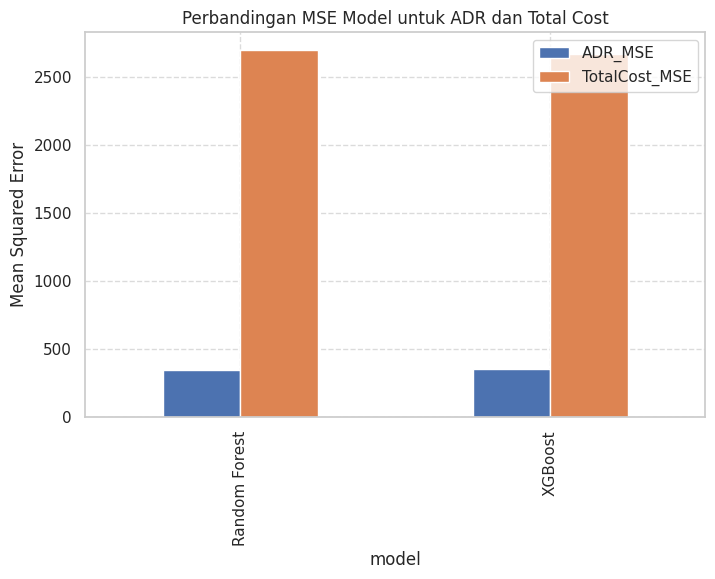

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Data MSE train dan test (kalau kamu ingin bandingkan, di sini contoh hanya test MSE)
mse_data = {
    'model': ['Random Forest', 'XGBoost'],
    'ADR_MSE': [mse_adr_rf, mse_adr_xgb],
    'TotalCost_MSE': [mse_cost_rf, mse_cost_xgb]
}

mse_df = pd.DataFrame(mse_data).set_index('model')

# Plot bar chart
ax = mse_df.plot(kind='bar', figsize=(8,5))
ax.set_ylabel('Mean Squared Error')
ax.set_title('Perbandingan MSE Model untuk ADR dan Total Cost')
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [37]:
# Ambil 5 data uji pertama
sample_data = X_test_multi.iloc[:5].copy() # Gunakan X_test_multi karena model multi-output dilatih di sana

# Buat dictionary hasil prediksi dan nilai aktual
pred_dict = {
    'y_true_adr': y_test_multi.iloc[:5, 0].values, # Ambil kolom 'adr' dari y_test_multi
    'y_true_cost': y_test_multi.iloc[:5, 1].values # Ambil kolom 'total_cost' dari y_test_multi
}

# Prediksi dengan Random Forest dan XGBoost (menggunakan model multi-output)
pred_rf_multi = multi_target_model.predict(sample_data)
pred_xgb_multi = multi_xgb_model.predict(sample_data)

# Ambil prediksi untuk ADR dan Total Cost dari output multi-model
pred_dict['prediksi_RF_adr'] = pred_rf_multi[:, 0].round(1)
pred_dict['prediksi_RF_cost'] = pred_rf_multi[:, 1].round(1) # Tambahkan prediksi RF untuk cost

pred_dict['prediksi_XGB_adr'] = pred_xgb_multi[:, 0].round(1) # Tambahkan prediksi XGB untuk adr
pred_dict['prediksi_XGB_cost'] = pred_xgb_multi[:, 1].round(1)

# Tampilkan sebagai DataFrame
import pandas as pd
pd.DataFrame(pred_dict)

,y_true_adr,y_true_cost,prediksi_RF_adr,prediksi_RF_cost,prediksi_XGB_adr,prediksi_XGB_cost
0,145.87,437.61,154.2,460.3,136.300003,392.500000
1,108.20,216.40,91.4,218.5,99.199997,205.199997
2,152.10,608.40,131.4,533.8,129.899994,506.700012
3,156.67,470.01,136.7,407.5,145.000000,453.100006
4,58.00,174.00,51.6,151.4,46.900002,140.899994


Dari tabel di atas, dapat dilihat bahwa setiap model memberikan hasil prediksi yang berbeda untuk nilai aktual adr dan total_cost. Secara umum, model Random Forest memberikan prediksi yang cukup dekat dengan nilai aktual, terutama untuk adr, namun pada beberapa baris seperti baris ke-3, prediksi total_cost dari Random Forest memiliki selisih yang cukup besar dari nilai sebenarnya.

Sementara itu, model XGBoost cenderung memberikan prediksi yang lebih konservatif dan konsisten, khususnya untuk total_cost. Pada beberapa baris, seperti baris ke-2 dan ke-5, XGBoost memberikan nilai prediksi yang lebih dekat dengan y_true dibandingkan Random Forest, menunjukkan bahwa model ini mampu menangkap pola hubungan fitur dan target dengan cukup baik, meskipun secara umum prediksinya sedikit underpredict terhadap nilai aktual.

Secara keseluruhan, performa kedua model menunjukkan variasi tergantung pada karakteristik data. Random Forest mampu menangkap variasi data dengan lebih fleksibel, namun kadang menghasilkan prediksi yang agak berlebih (overpredict). Sebaliknya, XGBoost memberikan prediksi yang lebih stabil dan sedikit lebih rendah dari nilai aktual, namun tetap kompetitif dari sisi akurasi. Pemilihan model terbaik sangat bergantung pada kebutuhan spesifik dan toleransi terhadap kesalahan prediksi dalam konteks penggunaan nyata.